This Jupyter Notebook that contains Julia code that appears in Spectral and Algebraic Graph Theory. 

If you want to try using this, you will need to install Jupyter (via Python), Julia and IJulia.  
You also need my package, called `Laplacians.jl`.  It may be added in Julia via

~~~
Using Pkg
Pkg.add("Laplacians")
~~~

This notebook was written in Julia version 1.10, the current Long-Term Support Version.

In [1]:
VERSION

v"1.10.7"

In [2]:
using Laplacians, LinearAlgebra, Plots, SparseArrays, FileIO, JLD2, Random

Whenever we need random numbers, we will reset the state of the psuedorandom number generator, so the results are replicable.

In [3]:
Random.seed!(0)

TaskLocalRNG()

The following ensures that figures are visible inside the saved version of this notebook.

In [4]:
gr()
default(fmt=:png)

If you want to zoom in and rotate figures, run a cell with the contents
~~~
plotlyjs()
~~~

The following is often useful for displaying arrays and vectors, although `print` or `@show` are usually sufficient.

In [5]:
function myshow(x)
    show(stdout, "text/plain", x)
    println()
end

myshow (generic function with 1 method)

# Introduction

## Path Graphs

In [6]:
M = path_graph(4)

4×4 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
  ⋅   1.0   ⋅    ⋅ 
 1.0   ⋅   1.0   ⋅ 
  ⋅   1.0   ⋅   1.0
  ⋅    ⋅   1.0   ⋅ 

In [7]:
Matrix(M)

4×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0

In [8]:
Matrix(lap(M))

4×4 Matrix{Float64}:
  1.0  -1.0   0.0   0.0
 -1.0   2.0  -1.0   0.0
  0.0  -1.0   2.0  -1.0
  0.0   0.0  -1.0   1.0

In [21]:
L = lap(path_graph(10));
E = eigen(Matrix(L))
myshow(E.values')

1×10 adjoint(::Vector{Float64}) with eltype Float64:
 0.0  0.097887  0.381966  0.824429  1.38197  2.0  2.61803  3.17557  3.61803  3.90211


In [22]:
E.vectors[:,1]

10-element Vector{Float64}:
 0.31622776601683755
 0.31622776601683716
 0.31622776601683766
 0.3162277660168381
 0.31622776601683855
 0.3162277660168381
 0.3162277660168385
 0.31622776601683805
 0.3162277660168378
 0.3162277660168378

In [23]:
v2 = E.vectors[:,2]

10-element Vector{Float64}:
  0.44170765403093926
  0.3984702312962002
  0.31622776601683794
  0.20303072371134548
  0.0699596195707542
 -0.06995961957075394
 -0.2030307237113458
 -0.3162277660168378
 -0.39847023129619985
 -0.44170765403093826

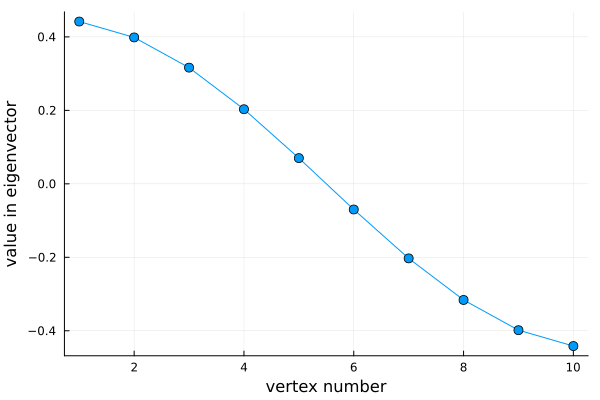

In [24]:
plot(v2,marker=5,legend=false)
xlabel!("vertex number")
ylabel!("value in eigenvector")

In [25]:
savefig("path10v2.pdf")

"/Users/spielman/Library/CloudStorage/Dropbox/gits/561/julia/path10v2.pdf"

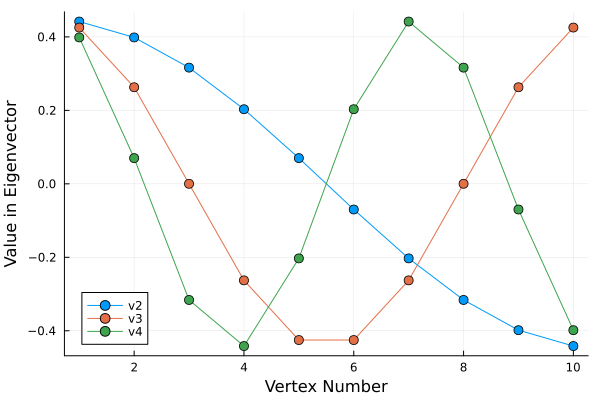

In [30]:
plot(E.vectors[:,2:4],label=["v2" "v3" "v4"],marker = 5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

In [27]:
savefig("path10vlow.pdf")

"/Users/spielman/Library/CloudStorage/Dropbox/gits/561/julia/path10vlow.pdf"

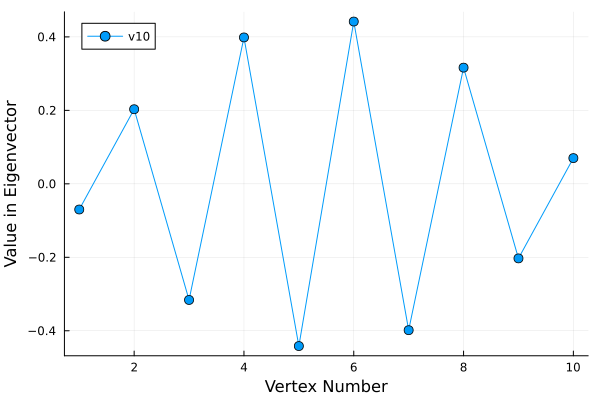

In [31]:
Plots.plot(E.vectors[:,10],label="v10",marker=5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

In [32]:
savefig("path10v10.pdf")

"/Users/spielman/Library/CloudStorage/Dropbox/gits/561/julia/path10v10.pdf"

## Spectral Graph Drawing -- a grid graph

In [33]:
M = grid2(3,4)
L = lap(M)
E = eigen(Matrix(L))
V = E.vectors[:,2:3]

12×2 Matrix{Float64}:
 -0.377172   0.353553
 -0.15623    0.353553
  0.15623    0.353553
  0.377172   0.353553
 -0.377172  -1.82922e-16
 -0.15623   -2.83761e-16
  0.15623   -1.05101e-16
  0.377172   1.1032e-16
 -0.377172  -0.353553
 -0.15623   -0.353553
  0.15623   -0.353553
  0.377172  -0.353553

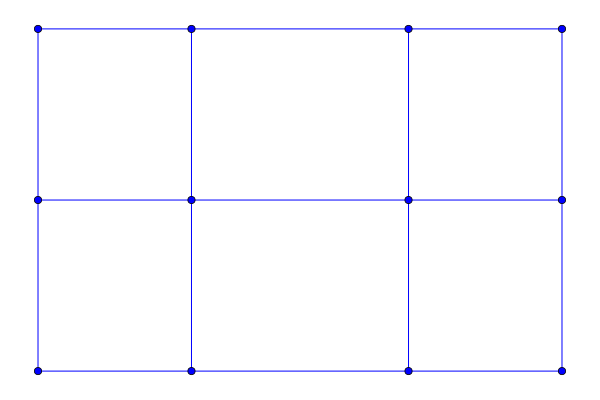

In [34]:
plot_graph(M,V[:,1],V[:,2]);

In [35]:
savefig("grid3x4.pdf")

"/Users/spielman/Library/CloudStorage/Dropbox/gits/561/julia/grid3x4.pdf"

## Spectral Graph Drawing -- The Yale Logo

In [27]:
@load "YALE.jld2"

4-element Vector{Symbol}:
 :a
 :xy
 :v2
 :v3

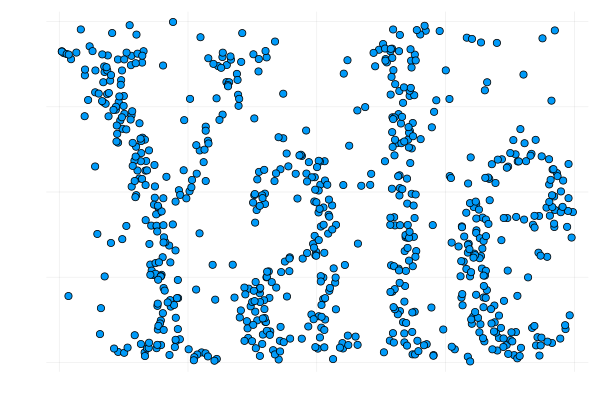

In [29]:
ax = scatter(xy[:,1],xy[:,2],legend=false, axis=false)

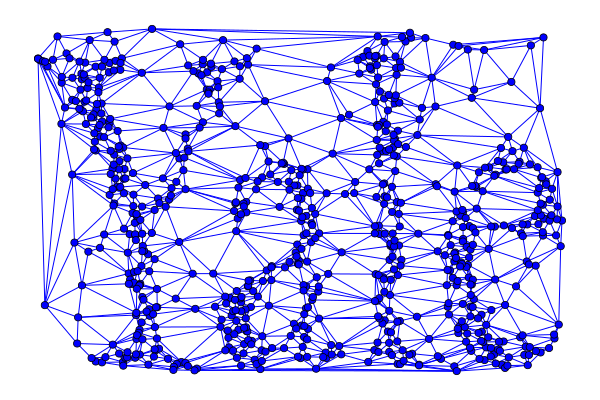

In [31]:
plot_graph(a,xy[:,1],xy[:,2]);

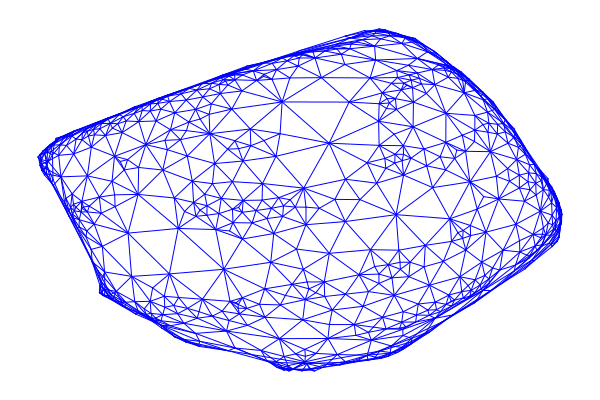

In [33]:
plot_graph(a, v2,v3, dots=false);

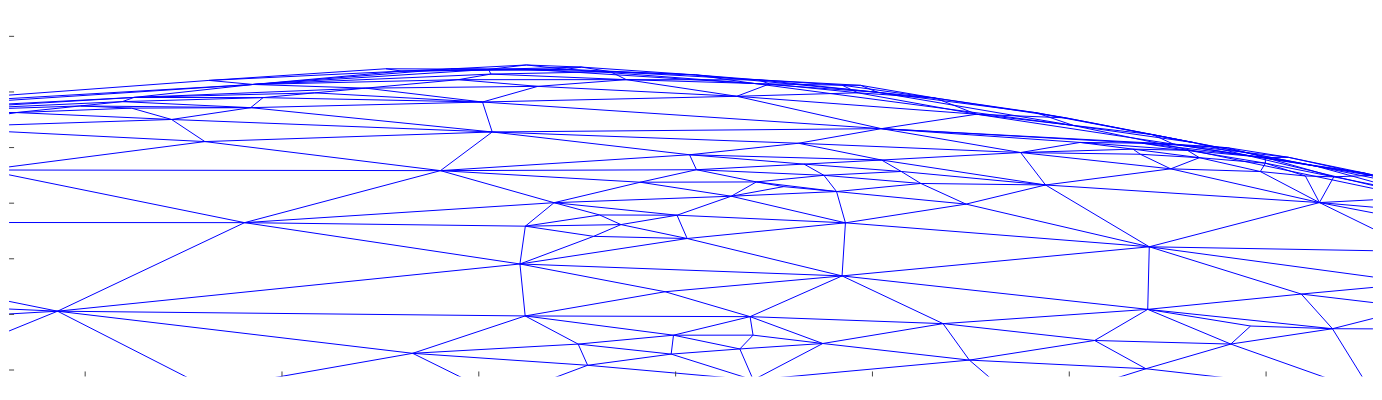

In [87]:
plotlyjs()
plot_graph(a, v2,v3, dots=false);

## Isomorphism

In [89]:
gr()

Plots.GRBackend()

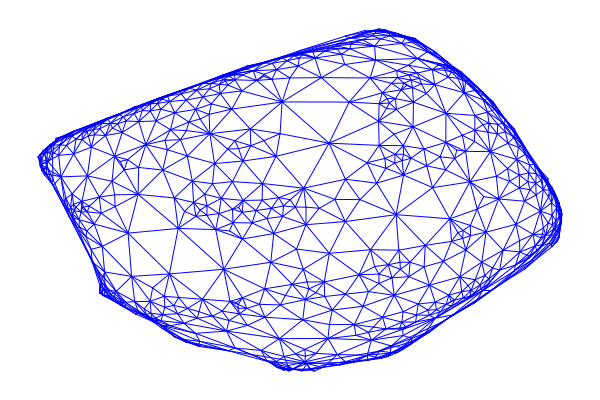

In [91]:
Random.seed!(1)
p = randperm(size(a,1))
M = a[p,p]
E = eigen(Matrix(lap(M)))
V = E.vectors[:,2:3]
plot_graph(M,V[:,1],V[:,2], dots=false);

## The dodecahedron

In [49]:
M = read_graph("dodec.txt")

20×20 SparseMatrixCSC{Float64, Int64} with 60 stored entries:
⎡⠪⡢⡁⢀⠀⠀⠄⠊⠀⠀⎤
⎢⠁⢈⠪⡢⠄⡀⠀⠀⠐⠀⎥
⎢⠀⠀⠀⠡⢪⠒⢄⠀⠀⢁⎥
⎢⡠⠁⠀⠀⠀⠑⠪⠂⣄⠀⎥
⎣⠀⠀⠐⠀⠄⢀⠀⠙⡠⡪⎦

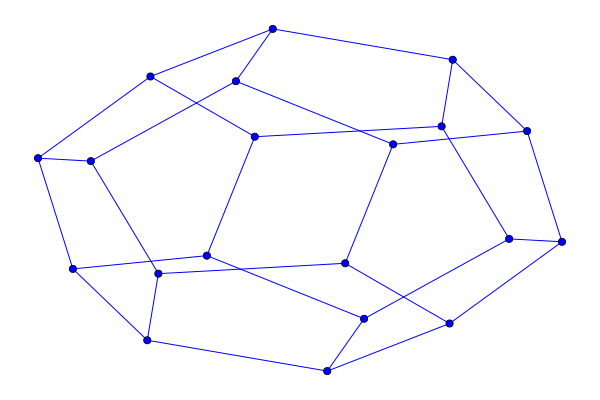

In [51]:
spectral_drawing(M);

In [53]:
E = eigen(Matrix(lap(M)))
println(E.values)

[0.0, 0.763932022500207, 0.7639320225002123, 0.7639320225002131, 1.9999999999999964, 1.9999999999999996, 2.0, 2.0000000000000018, 2.0000000000000058, 3.0, 3.0, 3.000000000000001, 3.000000000000006, 4.9999999999999964, 4.999999999999998, 4.999999999999999, 5.0, 5.236067977499789, 5.23606797749979, 5.236067977499791]


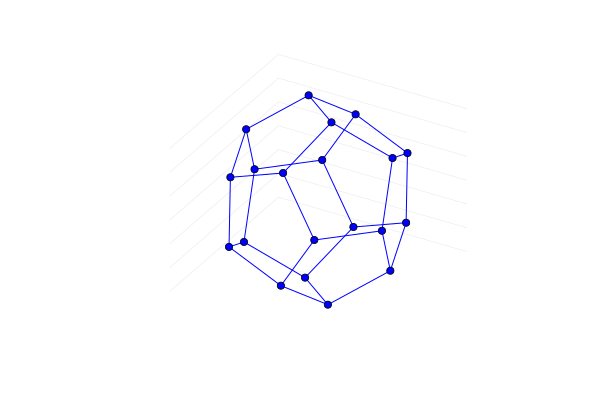

In [67]:
x = E.vectors[:,2]
y = E.vectors[:,3]
z = E.vectors[:,4]
plot_graph(M, x, y, z; setaxis=false);

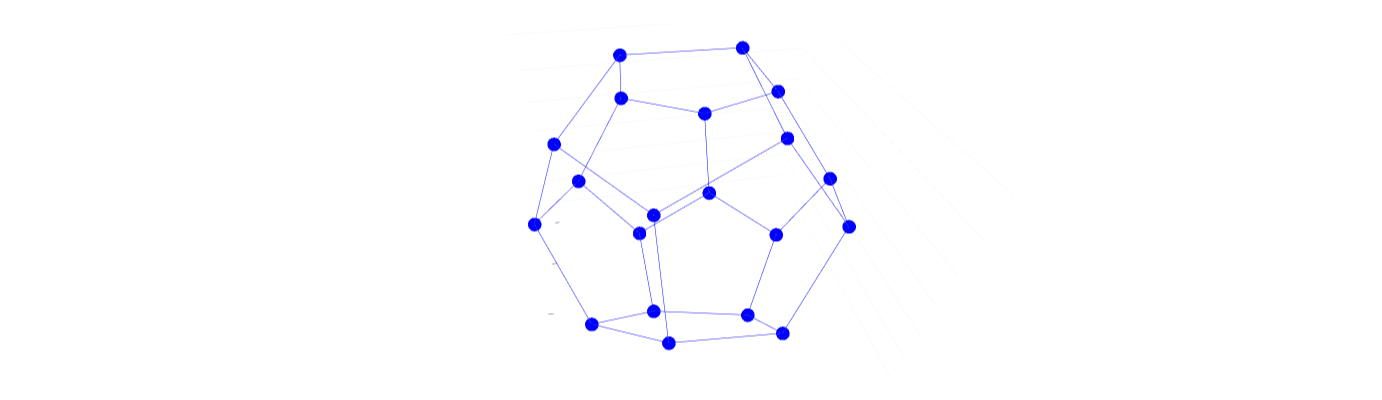

In [81]:
plotlyjs()
x = E.vectors[:,2]
y = E.vectors[:,3]
z = E.vectors[:,4]
plot_graph(M, x, y, z; setaxis=false);

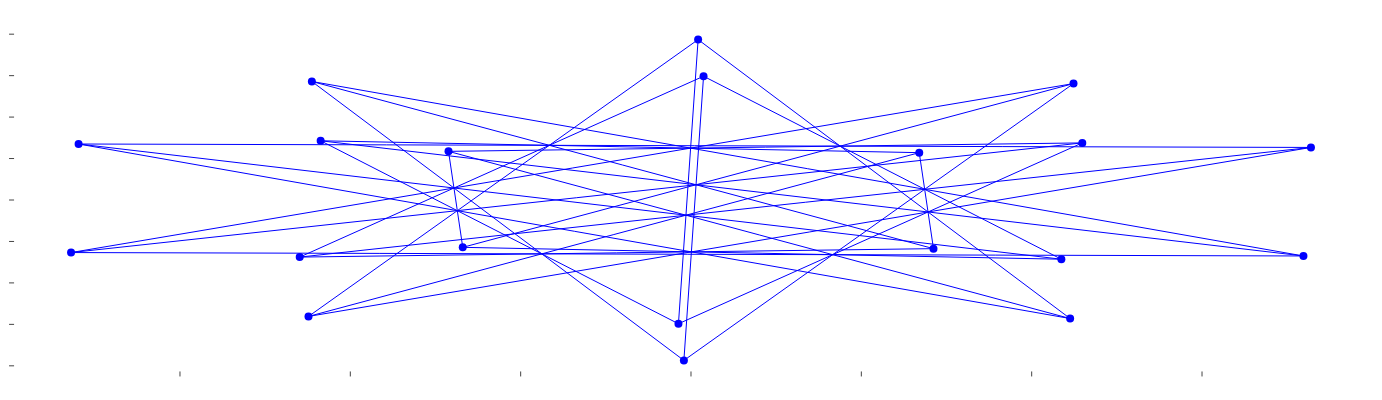

In [83]:
x = E.vectors[:,20]
y = E.vectors[:,19]
plot_graph(M, x, y; setaxis=false);


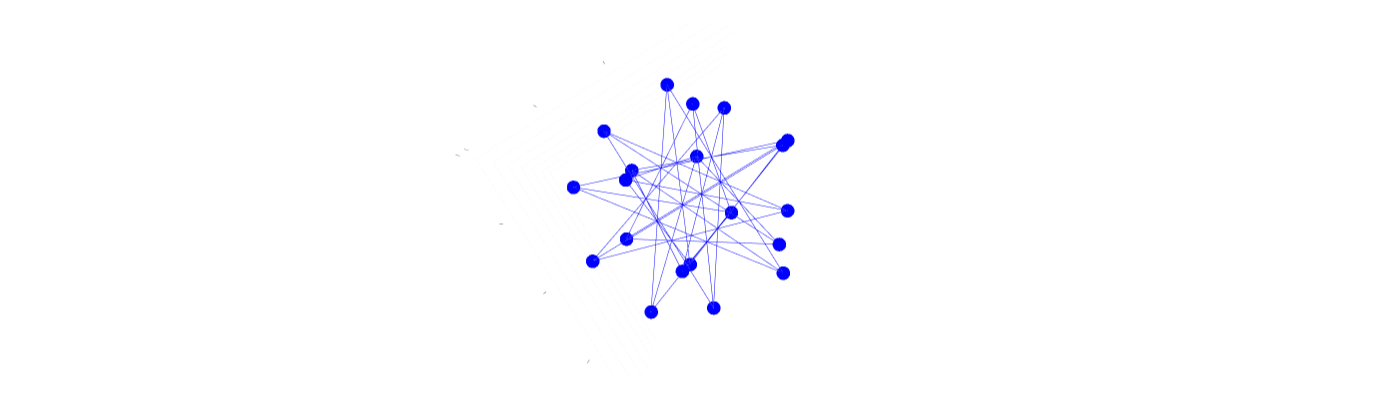

In [85]:
x = E.vectors[:,20]
y = E.vectors[:,19]
z = E.vectors[:,18]
plot_graph(M, x, y, z; setaxis=false);


In [ ]:
E.values